In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:



df=pd.read_csv(r"/content/drive/MyDrive/UNSW_2018_IoT_Botnet_Final_10_best_Training.csv")
df

,pkSeqID,proto,saddr,sport,daddr,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,category,subcategory
0,3142762,udp,192.168.100.150,6551,192.168.100.3,80,251984,1.900363,100,0.000000,4,2.687519,100,0.000000,0.494549,4.031619,1,DDoS,UDP
1,2432264,tcp,192.168.100.150,5532,192.168.100.3,80,256724,0.078003,38,3.856930,3,3.934927,100,0.000000,0.256493,4.012924,1,DDoS,TCP
2,1976315,tcp,192.168.100.147,27165,192.168.100.3,80,62921,0.268666,100,2.974100,3,3.341429,100,0.000000,0.294880,3.609205,1,DDoS,TCP
3,1240757,udp,192.168.100.150,48719,192.168.100.3,80,99168,1.823185,63,0.000000,4,3.222832,63,0.000000,0.461435,4.942302,1,DoS,UDP
4,3257991,udp,192.168.100.147,22461,192.168.100.3,80,105063,0.822418,100,2.979995,4,3.983222,100,0.000000,1.002999,4.994452,1,DDoS,UDP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2934812,1132803,udp,192.168.100.149,56044,192.168.100.5,80,253370,0.016992,100,4.082509,4,4.102515,100,0.000000,0.243473,4.124047,1,DoS,UDP
2934813,3384621,udp,192.168.100.150,21546,192.168.100.3,80,231693,1.922317,100,0.000000,4,2.718527,100,0.000000,0.490800,4.090534,1,DDoS,UDP
2934814,775893,udp,192.168.100.149,30897,192.168.100.5,80,158616,2.112228,100,0.000000,4,2.110766,100,0.000000,0.207444,4.332615,1,DoS,UDP
2934815,443484,tcp,192.168.100.147,36904,192.168.100.7,80,179855,0.000000,100,0.000000,3,0.000000,100,0.000000,0.162130,0.000000,1,DoS,TCP


In [5]:
train=df

In [6]:
dfn=pd.read_csv(r"/content/drive/MyDrive/UNSW_2018_IoT_Botnet_Final_10_best_Testing.csv")
dfn

,pkSeqID,proto,saddr,sport,daddr,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,category,subcategory
0,792371,udp,192.168.100.150,48516,192.168.100.3,80,175094,0.226784,100,4.100436,4,4.457383,100,0.000000,0.404711,4.719438,1,DoS,UDP
1,2056418,tcp,192.168.100.148,22267,192.168.100.3,80,143024,0.451998,100,3.439257,1,3.806172,100,0.225077,0.401397,4.442930,1,DDoS,TCP
2,2795650,udp,192.168.100.149,28629,192.168.100.3,80,167033,1.931553,73,0.000000,4,2.731204,100,0.000000,0.407287,4.138455,1,DDoS,UDP
3,2118009,tcp,192.168.100.148,42142,192.168.100.3,80,204615,0.428798,56,3.271411,1,3.626428,100,0.000000,0.343654,4.229700,1,DDoS,TCP
4,303688,tcp,192.168.100.149,1645,192.168.100.5,80,40058,2.058381,100,0.000000,3,1.188407,100,0.000000,0.135842,4.753628,1,DoS,TCP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733700,1571905,udp,192.168.100.148,17412,192.168.100.6,80,168162,1.743940,39,0.000000,4,3.020449,39,0.000000,0.224603,4.043432,1,DoS,UDP
733701,2787099,udp,192.168.100.147,932,192.168.100.3,80,158482,0.694618,65,3.002272,4,3.905409,100,0.000000,0.875121,4.691634,1,DDoS,UDP
733702,2255382,tcp,192.168.100.149,47980,192.168.100.3,80,79841,1.744651,53,0.000000,1,2.464288,100,0.278496,0.472773,3.802142,1,DDoS,TCP
733703,588946,tcp,192.168.100.147,25096,192.168.100.7,80,63165,0.000000,100,0.000000,3,0.000000,100,0.000000,0.070461,0.000000,1,DoS,TCP


In [7]:
frames = [df,dfn]

df = pd.concat(frames)

In [8]:
df.isnull().sum()

pkSeqID              0
proto                0
saddr                0
sport                0
daddr                0
dport                0
seq                  0
stddev               0
N_IN_Conn_P_SrcIP    0
min                  0
state_number         0
mean                 0
N_IN_Conn_P_DstIP    0
drate                0
srate                0
max                  0
attack               0
category             0
subcategory          0
dtype: int64

In [9]:
df.duplicated(keep='first').sum()

0

In [10]:
df.describe()

,pkSeqID,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack
count,3.668522e+06,3.668522e+06,3.668522e+06,3.668522e+06,3.668522e+06,3.668522e+06,3.668522e+06,3.668522e+06,3.668522e+06,3.668522e+06,3.668522e+06,3.668522e+06
mean,1.834262e+06,1.213204e+05,8.871499e-01,8.253848e+01,1.017540e+00,3.134390e+00,2.231063e+00,9.245168e+01,4.455046e-01,2.955111e+00,3.020015e+00,9.998700e-01
std,1.059011e+06,7.579428e+04,8.037139e-01,2.439739e+01,1.483688e+00,1.186971e+00,1.517728e+00,1.817643e+01,6.028863e+01,7.245425e+02,1.860877e+00,1.140212e-02
min,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,9.171312e+05,5.487600e+04,3.001900e-02,6.900000e+01,0.000000e+00,3.000000e+00,1.819670e-01,1.000000e+02,0.000000e+00,1.559700e-01,2.806072e-01,1.000000e+00
50%,1.834262e+06,1.177690e+05,7.938960e-01,1.000000e+02,0.000000e+00,4.000000e+00,2.690125e+00,1.000000e+02,0.000000e+00,2.837830e-01,4.009111e+00,1.000000e+00
75%,2.751392e+06,1.849300e+05,1.745296e+00,1.000000e+02,2.151138e+00,4.000000e+00,3.565203e+00,1.000000e+02,0.000000e+00,4.882010e-01,4.293582e+00,1.000000e+00
max,3.668522e+06,2.622120e+05,2.496763e+00,1.000000e+02,4.980471e+00,1.100000e+01,4.981882e+00,1.000000e+02,5.882353e+04,1.000000e+06,4.999999e+00,1.000000e+00


Different types of attack categories and their counts

In [11]:
df['category'].value_counts()

DDoS              1926624
DoS               1650260
Reconnaissance      91082
Normal                477
Theft                  79
Name: category, dtype: int64

Different types of protoclas and their counts

In [12]:
df['proto'].value_counts()

udp          1996437
tcp          1662812
icmp            9052
arp              213
ipv6-icmp          8
Name: proto, dtype: int64

In [13]:
import pandas as pd
import numpy as np
import scipy as sci
import matplotlib.pyplot as plt
import seaborn as sns

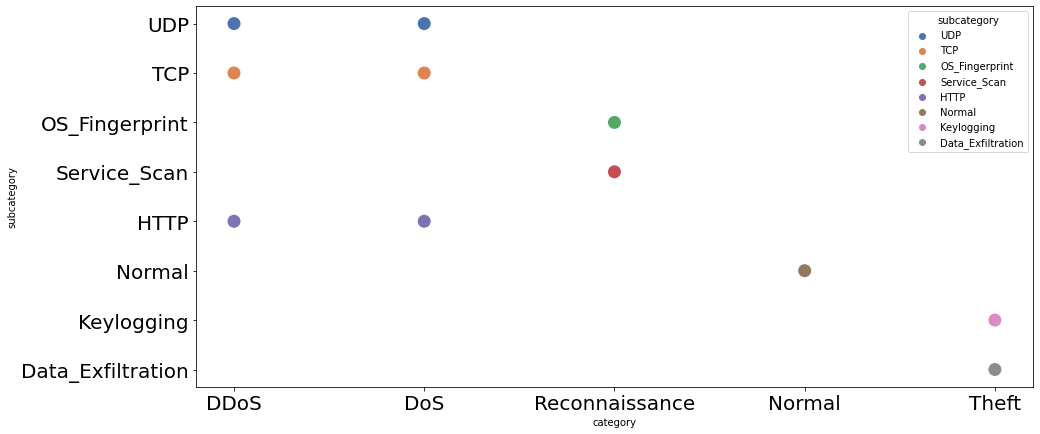

In [19]:
plt.figure(figsize=(15,7))
plt.xticks(size = 20)
plt.yticks(size = 20)
sns.scatterplot(data=df,x='category',y='subcategory',hue='subcategory', s=200,palette="deep" )

SCATTER PLOT BETWEEN TARGET CATEGORY AND FEATURE PROTOCALS

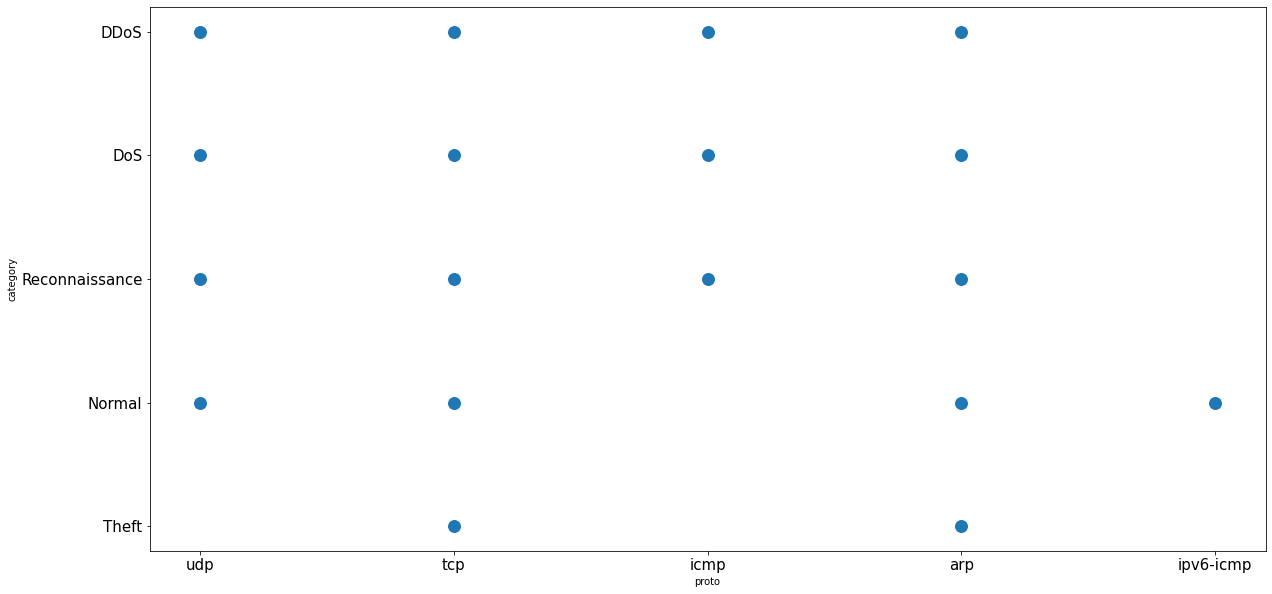

In [ ]:
plt.figure(figsize=(20,10))
plt.xticks(size = 15)
plt.yticks(size = 15)
sns.scatterplot(data=df,x='proto',y='category',s=200,palette="deep" )

In [ ]:
df2=df[df['proto']=='udp']
df2

,pkSeqID,proto,saddr,sport,daddr,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,category,subcategory
0,3142762,udp,192.168.100.150,6551,192.168.100.3,80,251984,1.900363,100,0.000000,4,2.687519,100,0.0,0.494549,4.031619,1,DDoS,UDP
3,1240757,udp,192.168.100.150,48719,192.168.100.3,80,99168,1.823185,63,0.000000,4,3.222832,63,0.0,0.461435,4.942302,1,DoS,UDP
4,3257991,udp,192.168.100.147,22461,192.168.100.3,80,105063,0.822418,100,2.979995,4,3.983222,100,0.0,1.002999,4.994452,1,DDoS,UDP
6,3406860,udp,192.168.100.150,31712,192.168.100.3,80,253932,1.928021,100,0.000000,4,2.726619,100,0.0,0.490708,4.097849,1,DDoS,UDP
7,787741,udp,192.168.100.149,33530,192.168.100.5,80,170464,2.113912,100,0.000000,4,2.112801,100,0.0,0.209328,4.322539,1,DoS,UDP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733695,3180980,udp,192.168.100.148,40888,192.168.100.3,80,28052,0.647403,100,2.774062,4,3.689443,100,0.0,0.723898,4.163064,1,DDoS,UDP
733696,2926931,udp,192.168.100.149,16389,192.168.100.3,80,36153,0.952928,100,2.038340,4,3.385985,100,0.0,0.492985,4.061055,1,DDoS,UDP
733699,1304990,udp,192.168.100.147,59059,192.168.100.7,80,163401,1.798542,100,0.000000,4,3.015325,100,0.0,0.199845,4.758004,1,DoS,UDP
733700,1571905,udp,192.168.100.148,17412,192.168.100.6,80,168162,1.743940,39,0.000000,4,3.020449,39,0.0,0.224603,4.043432,1,DoS,UDP


In [ ]:
df2=df[df['proto']=='udp']
df2

df2 = df2.groupby('category')['proto'].count().to_frame().reset_index()
df2


,category,proto
0,DDoS,948223
1,DoS,1032937
2,Normal,375
3,Reconnaissance,14902


CHECKING HOW MUCH PERCENTAGE OF EACH ATTACK CATEGORY FOR PROTOCAL UDP

         category    count
0            DDoS   948223
1             DoS  1032937
2          Normal      375
3  Reconnaissance    14902


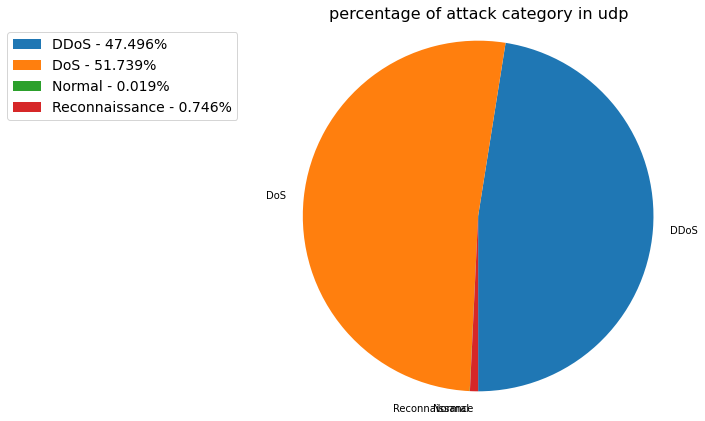

In [ ]:
df2=df[df['proto']=='udp']
df2

df2 = df2.groupby('category')['proto'].count().to_frame().reset_index()
df2.rename({'proto': 'count'}, axis=1, inplace=True)
df2
print(df2)

plt.figure(figsize = (7,7))
y= df2['count'] 
x =df2.category
labels= 100.*y/y.sum()
import matplotlib.pyplot as plt

labels = [f'{l} - {s:1.3f}%' for l, s in zip(x,labels)]

patches, texts = plt.pie(y, startangle=270,labels=x)
plt.legend(patches, labels,  bbox_to_anchor=(-0.1, 1.), fontsize=14)
plt.axis('equal')
plt.title('percentage of attack category in udp',fontsize=16) 
plt.show()

In [ ]:
'''import matplotlib.pyplot as plt
import numpy as np

y= df2['proto'] 
x =df2.category
porcent = 100*y/y.sum()
plt.figure(figsize = (10,10))

patches, texts = plt.pie(y, startangle=270, radius=1.2, shadow = True)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]
plt.title('percentage of category in udp') 
sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='left center', bbox_to_anchor=(-0.1, 1),
           fontsize=15)'''

"import matplotlib.pyplot as plt\nimport numpy as np\n\ny= df2['proto'] \nx =df2.category\nporcent = 100*y/y.sum()\nplt.figure(figsize = (10,10))\n\npatches, texts = plt.pie(y, startangle=270, radius=1.2, shadow = True)\nlabels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]\nplt.title('percentage of category in udp') \nsort_legend = True\nif sort_legend:\n    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),\n                                          key=lambda x: x[2],\n                                          reverse=True))\n\nplt.legend(patches, labels, loc='left center', bbox_to_anchor=(-0.1, 1),\n           fontsize=15)"

CHECKING HOW MUCH PERCENTAGE OF EACH ATTACK CATEGORY FOR PROTOCAL TCP

In [ ]:
"""df2=df[df['proto']=='tcp']
df2

df2 = df2.groupby('category')['proto'].count().to_frame().reset_index()
df2

plt.figure(figsize = (10,10))

plt.rcParams.update({'font.size': 15})
textprops = {"fontsize":15}
#plt.pie(df2['is_product_recomended'], labels = df2.categories) 
plt.pie(df2['proto'], labels = df2.category,autopct = "%0.2f%%", # Show data in persentage for with 2 decimal point
        shadow = True, # Showing shadow of pie chart
        radius = 1.4, # Radius to increase or decrease the size of pie chart 
       startangle = 270, # Start angle of first section
        textprops =textprops) 

plt.title('percentage of attack category in tcp') 
plt.titlesize      : 30

plt.show()"""

'df2=df[df[\'proto\']==\'tcp\']\ndf2\n\ndf2 = df2.groupby(\'category\')[\'proto\'].count().to_frame().reset_index()\ndf2\n\nplt.figure(figsize = (10,10))\n\nplt.rcParams.update({\'font.size\': 15})\ntextprops = {"fontsize":15}\n#plt.pie(df2[\'is_product_recomended\'], labels = df2.categories) \nplt.pie(df2[\'proto\'], labels = df2.category,autopct = "%0.2f%%", # Show data in persentage for with 2 decimal point\n        shadow = True, # Showing shadow of pie chart\n        radius = 1.4, # Radius to increase or decrease the size of pie chart \n       startangle = 270, # Start angle of first section\n        textprops =textprops) \n\nplt.title(\'percentage of attack category in tcp\') \nplt.titlesize      : 30\n\nplt.show()'

         category   count
0            DDoS  978350
1             DoS  617260
2          Normal      47
3  Reconnaissance   67080
4           Theft      75


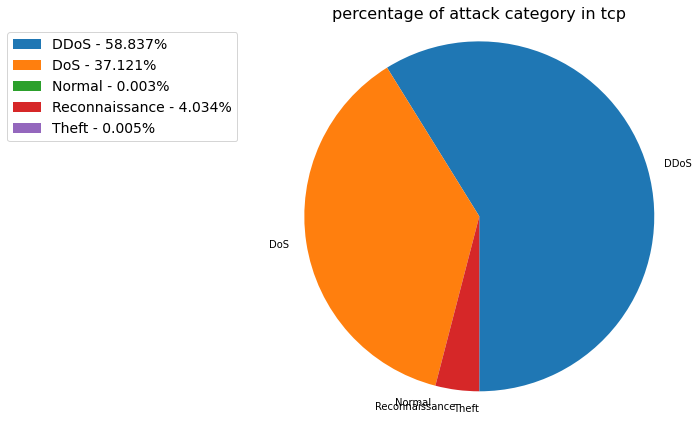

In [ ]:
df2=df[df['proto']=='tcp']
df2

df2 = df2.groupby('category')['proto'].count().to_frame().reset_index()
df2
df2.rename({'proto': 'count'}, axis=1, inplace=True)
print(df2)

plt.figure(figsize = (7,7))
y= df2['count'] 
x =df2.category
labels= 100.*y/y.sum()
import matplotlib.pyplot as plt

labels = [f'{l} - {s:1.3f}%' for l, s in zip(x,labels)]

patches, texts = plt.pie(y, startangle=270,labels=x)
plt.legend(patches, labels,  bbox_to_anchor=(-0.1, 1.), fontsize=14)
plt.axis('equal')
plt.title('percentage of attack category in tcp',fontsize=16) 
plt.show()

CHECKING HOW MUCH PERCENTAGE OF EACH ATTACK CATEGORY FOR PROTOCAL icmp

In [ ]:
"""df2=df[df['proto']=='icmp']
df2

df2 = df2.groupby('category')['proto'].count().to_frame().reset_index()
df2
df2.rename({'proto': 'count'}, axis=1, inplace=True)

plt.figure(figsize = (10,10))

plt.rcParams.update({'font.size': 15})
textprops = {"fontsize":15}
#plt.pie(df2['is_product_recomended'], labels = df2.categories) 
plt.pie(df2['count'], labels = df2.category,autopct = "%0.2f%%", # Show data in persentage for with 2 decimal point
        shadow = True, # Showing shadow of pie chart
        radius = 1.4, # Radius to increase or decrease the size of pie chart 
       startangle = 270, # Start angle of first section
        textprops =textprops) 

plt.title('percentage of category in icmp') 

plt.show()"""

'df2=df[df[\'proto\']==\'icmp\']\ndf2\n\ndf2 = df2.groupby(\'category\')[\'proto\'].count().to_frame().reset_index()\ndf2\ndf2.rename({\'proto\': \'count\'}, axis=1, inplace=True)\n\nplt.figure(figsize = (10,10))\n\nplt.rcParams.update({\'font.size\': 15})\ntextprops = {"fontsize":15}\n#plt.pie(df2[\'is_product_recomended\'], labels = df2.categories) \nplt.pie(df2[\'count\'], labels = df2.category,autopct = "%0.2f%%", # Show data in persentage for with 2 decimal point\n        shadow = True, # Showing shadow of pie chart\n        radius = 1.4, # Radius to increase or decrease the size of pie chart \n       startangle = 270, # Start angle of first section\n        textprops =textprops) \n\nplt.title(\'percentage of category in icmp\') \n\nplt.show()'

         category  count
0            DDoS     16
1             DoS     14
2  Reconnaissance   9022


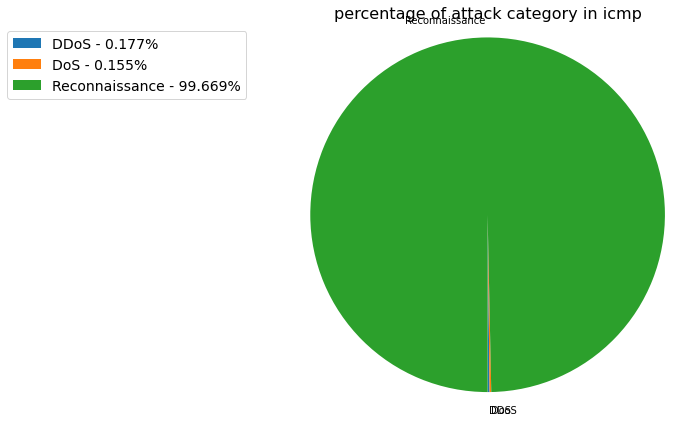

In [ ]:
df2=df[df['proto']=='icmp']
df2

df2 = df2.groupby('category')['proto'].count().to_frame().reset_index()
df2
df2.rename({'proto': 'count'}, axis=1, inplace=True)
print(df2)

plt.figure(figsize = (7,7))
y= df2['count'] 
x =df2.category
labels= 100.*y/y.sum()
import matplotlib.pyplot as plt

labels = [f'{l} - {s:1.3f}%' for l, s in zip(x,labels)]

patches, texts = plt.pie(y, startangle=270,labels=x)
plt.legend(patches, labels,  bbox_to_anchor=(-0.1, 1.), fontsize=14)
plt.axis('equal')
plt.title('percentage of attack category in icmp',fontsize=16) 
plt.show()

CHECKING HOW MUCH PERCENTAGE OF EACH ATTACK CATEGORY FOR PROTOCAL arp

In [ ]:
"""df2=df[df['proto']=='arp']
df2

df2 = df2.groupby('category')['proto'].count().to_frame().reset_index()
df2

plt.figure(figsize = (10,10))

plt.rcParams.update({'font.size': 15})
textprops = {"fontsize":15}
#plt.pie(df2['is_product_recomended'], labels = df2.categories) 
plt.pie(df2['proto'], labels = df2.category,autopct = "%0.2f%%", # Show data in persentage for with 2 decimal point
        shadow = True, # Showing shadow of pie chart
        radius = 1.4, # Radius to increase or decrease the size of pie chart 
       startangle = 270, # Start angle of first section
        textprops =textprops) 

plt.title('percentage of category in arp') 

plt.show()"""

'df2=df[df[\'proto\']==\'arp\']\ndf2\n\ndf2 = df2.groupby(\'category\')[\'proto\'].count().to_frame().reset_index()\ndf2\n\nplt.figure(figsize = (10,10))\n\nplt.rcParams.update({\'font.size\': 15})\ntextprops = {"fontsize":15}\n#plt.pie(df2[\'is_product_recomended\'], labels = df2.categories) \nplt.pie(df2[\'proto\'], labels = df2.category,autopct = "%0.2f%%", # Show data in persentage for with 2 decimal point\n        shadow = True, # Showing shadow of pie chart\n        radius = 1.4, # Radius to increase or decrease the size of pie chart \n       startangle = 270, # Start angle of first section\n        textprops =textprops) \n\nplt.title(\'percentage of category in arp\') \n\nplt.show()'

         category  count
0            DDoS     35
1             DoS     49
2          Normal     47
3  Reconnaissance     78
4           Theft      4


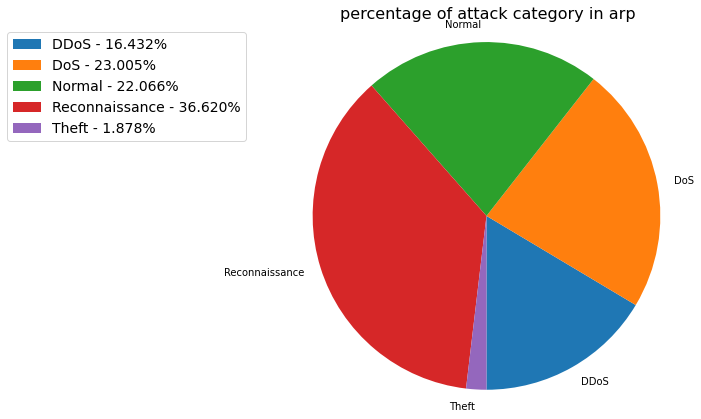

In [ ]:
df2=df[df['proto']=='arp']
df2

df2 = df2.groupby('category')['proto'].count().to_frame().reset_index()
df2.rename({'proto': 'count'}, axis=1, inplace=True)
df2
print(df2)

plt.figure(figsize = (7,7))
y= df2['count'] 
x =df2.category
labels= 100.*y/y.sum()
import matplotlib.pyplot as plt

labels = [f'{l} - {s:1.3f}%' for l, s in zip(x,labels)]

patches, texts = plt.pie(y, startangle=270,labels=x)
plt.legend(patches, labels,  bbox_to_anchor=(-0.1, 1.), fontsize=14)
plt.axis('equal')
plt.title('percentage of attack category in arp',fontsize=16) 
plt.show()

CHECKING HOW MUCH PERCENTAGE OF EACH ATTACK CATEGORY FOR PROTOCAL ipv6-icmp

In [ ]:
"""df2=df[df['proto']=='ipv6-icmp']
df2

df2 = df2.groupby('category')['proto'].count().to_frame().reset_index()
df2

plt.figure(figsize = (10,10))

plt.rcParams.update({'font.size': 15})
textprops = {"fontsize":15}
#plt.pie(df2['is_product_recomended'], labels = df2.categories) 
plt.pie(df2['proto'], labels = df2.category,autopct = "%0.2f%%", # Show data in persentage for with 2 decimal point
        shadow = True, # Showing shadow of pie chart
        radius = 1.4, # Radius to increase or decrease the size of pie chart 
       startangle = 270, # Start angle of first section
        textprops =textprops) 

plt.title('percentage of category in ipv6-icmp ') 

plt.show()"""


'df2=df[df[\'proto\']==\'ipv6-icmp\']\ndf2\n\ndf2 = df2.groupby(\'category\')[\'proto\'].count().to_frame().reset_index()\ndf2\n\nplt.figure(figsize = (10,10))\n\nplt.rcParams.update({\'font.size\': 15})\ntextprops = {"fontsize":15}\n#plt.pie(df2[\'is_product_recomended\'], labels = df2.categories) \nplt.pie(df2[\'proto\'], labels = df2.category,autopct = "%0.2f%%", # Show data in persentage for with 2 decimal point\n        shadow = True, # Showing shadow of pie chart\n        radius = 1.4, # Radius to increase or decrease the size of pie chart \n       startangle = 270, # Start angle of first section\n        textprops =textprops) \n\nplt.title(\'percentage of category in ipv6-icmp \') \n\nplt.show()'

  category  count
0   Normal      8


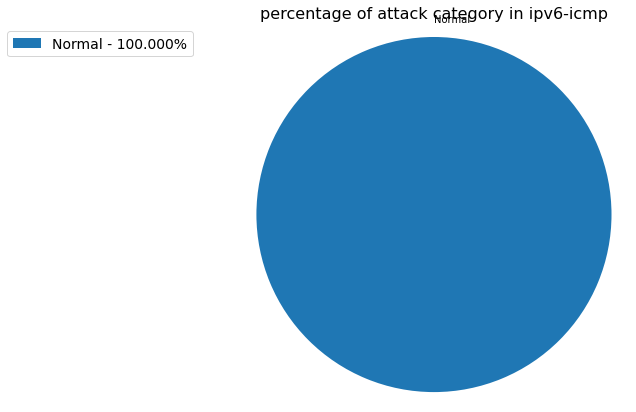

In [ ]:
df2=df[df['proto']=='ipv6-icmp']
df2

df2 = df2.groupby('category')['proto'].count().to_frame().reset_index()
df2
df2.rename({'proto': 'count'}, axis=1, inplace=True)
print(df2)

plt.figure(figsize = (7,7))
y= df2['count'] 
x =df2.category
labels= 100.*y/y.sum()
import matplotlib.pyplot as plt

labels = [f'{l} - {s:1.3f}%' for l, s in zip(x,labels)]

patches, texts = plt.pie(y, startangle=270,labels=x)
plt.legend(patches, labels,  bbox_to_anchor=(-0.1, 1.), fontsize=14)
plt.axis('equal')
plt.title('percentage of attack category in ipv6-icmp',fontsize=16) 
plt.show()

In [ ]:
df

,pkSeqID,proto,saddr,sport,daddr,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,category,subcategory
0,3142762,udp,192.168.100.150,6551,192.168.100.3,80,251984,1.900363,100,0.000000,4,2.687519,100,0.000000,0.494549,4.031619,1,DDoS,UDP
1,2432264,tcp,192.168.100.150,5532,192.168.100.3,80,256724,0.078003,38,3.856930,3,3.934927,100,0.000000,0.256493,4.012924,1,DDoS,TCP
2,1976315,tcp,192.168.100.147,27165,192.168.100.3,80,62921,0.268666,100,2.974100,3,3.341429,100,0.000000,0.294880,3.609205,1,DDoS,TCP
3,1240757,udp,192.168.100.150,48719,192.168.100.3,80,99168,1.823185,63,0.000000,4,3.222832,63,0.000000,0.461435,4.942302,1,DoS,UDP
4,3257991,udp,192.168.100.147,22461,192.168.100.3,80,105063,0.822418,100,2.979995,4,3.983222,100,0.000000,1.002999,4.994452,1,DDoS,UDP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733700,1571905,udp,192.168.100.148,17412,192.168.100.6,80,168162,1.743940,39,0.000000,4,3.020449,39,0.000000,0.224603,4.043432,1,DoS,UDP
733701,2787099,udp,192.168.100.147,932,192.168.100.3,80,158482,0.694618,65,3.002272,4,3.905409,100,0.000000,0.875121,4.691634,1,DDoS,UDP
733702,2255382,tcp,192.168.100.149,47980,192.168.100.3,80,79841,1.744651,53,0.000000,1,2.464288,100,0.278496,0.472773,3.802142,1,DDoS,TCP
733703,588946,tcp,192.168.100.147,25096,192.168.100.7,80,63165,0.000000,100,0.000000,3,0.000000,100,0.000000,0.070461,0.000000,1,DoS,TCP


LABEL ENCDONG TARGET VARIABLE CATEGORY

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['category']= label_encoder.fit_transform(df['category'])
dic = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(dic)

{'DDoS': 0, 'DoS': 1, 'Normal': 2, 'Reconnaissance': 3, 'Theft': 4}


PLOTTING CORRELATION

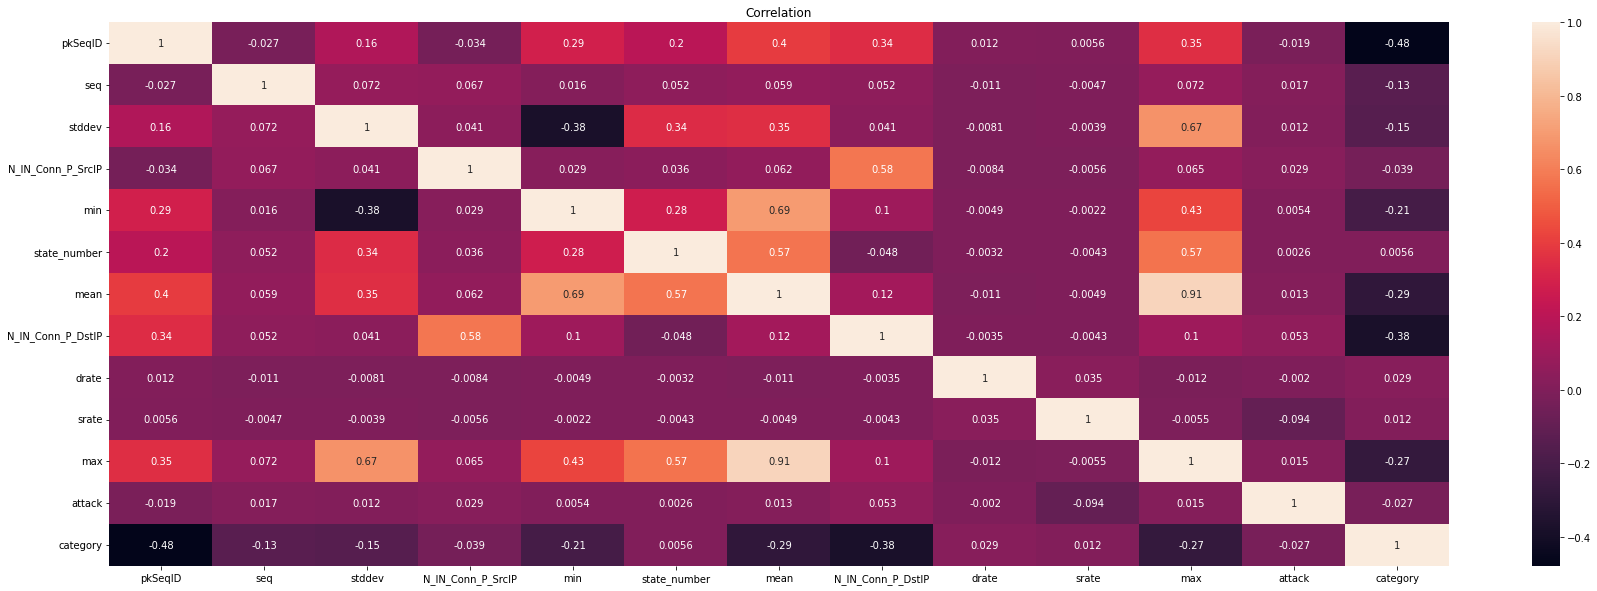

In [ ]:

import seaborn as sns
plt.figure(figsize=(30,10))
plt.title('Correlation')

  
#ploting the heatmap for correlation
sns.heatmap(df.corr(),annot=True )

In [ ]:

df

,pkSeqID,proto,saddr,sport,daddr,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,category,subcategory
0,3142762,udp,192.168.100.150,6551,192.168.100.3,80,251984,1.900363,100,0.000000,4,2.687519,100,0.000000,0.494549,4.031619,1,0,UDP
1,2432264,tcp,192.168.100.150,5532,192.168.100.3,80,256724,0.078003,38,3.856930,3,3.934927,100,0.000000,0.256493,4.012924,1,0,TCP
2,1976315,tcp,192.168.100.147,27165,192.168.100.3,80,62921,0.268666,100,2.974100,3,3.341429,100,0.000000,0.294880,3.609205,1,0,TCP
3,1240757,udp,192.168.100.150,48719,192.168.100.3,80,99168,1.823185,63,0.000000,4,3.222832,63,0.000000,0.461435,4.942302,1,1,UDP
4,3257991,udp,192.168.100.147,22461,192.168.100.3,80,105063,0.822418,100,2.979995,4,3.983222,100,0.000000,1.002999,4.994452,1,0,UDP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733700,1571905,udp,192.168.100.148,17412,192.168.100.6,80,168162,1.743940,39,0.000000,4,3.020449,39,0.000000,0.224603,4.043432,1,1,UDP
733701,2787099,udp,192.168.100.147,932,192.168.100.3,80,158482,0.694618,65,3.002272,4,3.905409,100,0.000000,0.875121,4.691634,1,0,UDP
733702,2255382,tcp,192.168.100.149,47980,192.168.100.3,80,79841,1.744651,53,0.000000,1,2.464288,100,0.278496,0.472773,3.802142,1,0,TCP
733703,588946,tcp,192.168.100.147,25096,192.168.100.7,80,63165,0.000000,100,0.000000,3,0.000000,100,0.000000,0.070461,0.000000,1,1,TCP


In [ ]:
df.dport

0         80
1         80
2         80
3         80
4         80
          ..
733700    80
733701    80
733702    80
733703    80
733704    80
Name: dport, Length: 3668522, dtype: object

DROPPING SADDR AND DADDR

In [ ]:
df=df.drop(['saddr'],axis=1)

In [ ]:
df=df.drop(['daddr'],axis=1)

LABEL ENCODING THE FEATURE PROTO

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['proto']= label_encoder.fit_transform(df['proto'])
dic = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(dic)

{'arp': 0, 'icmp': 1, 'ipv6-icmp': 2, 'tcp': 3, 'udp': 4}


In [ ]:
df

,pkSeqID,proto,sport,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,category,subcategory
0,3142762,4,6551,80,251984,1.900363,100,0.000000,4,2.687519,100,0.000000,0.494549,4.031619,1,0,UDP
1,2432264,3,5532,80,256724,0.078003,38,3.856930,3,3.934927,100,0.000000,0.256493,4.012924,1,0,TCP
2,1976315,3,27165,80,62921,0.268666,100,2.974100,3,3.341429,100,0.000000,0.294880,3.609205,1,0,TCP
3,1240757,4,48719,80,99168,1.823185,63,0.000000,4,3.222832,63,0.000000,0.461435,4.942302,1,1,UDP
4,3257991,4,22461,80,105063,0.822418,100,2.979995,4,3.983222,100,0.000000,1.002999,4.994452,1,0,UDP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733700,1571905,4,17412,80,168162,1.743940,39,0.000000,4,3.020449,39,0.000000,0.224603,4.043432,1,1,UDP
733701,2787099,4,932,80,158482,0.694618,65,3.002272,4,3.905409,100,0.000000,0.875121,4.691634,1,0,UDP
733702,2255382,3,47980,80,79841,1.744651,53,0.000000,1,2.464288,100,0.278496,0.472773,3.802142,1,0,TCP
733703,588946,3,25096,80,63165,0.000000,100,0.000000,3,0.000000,100,0.000000,0.070461,0.000000,1,1,TCP


In [ ]:
df.dtypes

pkSeqID                int64
proto                  int64
sport                 object
dport                 object
seq                    int64
stddev               float64
N_IN_Conn_P_SrcIP      int64
min                  float64
state_number           int64
mean                 float64
N_IN_Conn_P_DstIP      int64
drate                float64
srate                float64
max                  float64
attack                 int64
category               int64
subcategory           object
dtype: object

As featrures sport and dport is obeject and analyzing rows contaning strings

In [ ]:
import string
df4 = pd.DataFrame()

for i in string.ascii_lowercase:
     df1 = df[df['sport'].str.contains(i)]
     
    
     if(df1.size>0):
         frames = [df1, df4]
  
         df4 = pd.concat(frames)
         #print(df1['category'])
df4


,pkSeqID,proto,sport,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,category,subcategory
149,3606493,1,0x0303,0x0c80,11703,0.000000,43,0.000000,5,0.000000,11,0.000000,0.000000,0.000000,1,3,Service_Scan
399,3608842,1,0x0303,0x42e0,14203,0.000000,42,0.000000,5,0.000000,11,0.000000,0.000000,0.000000,1,3,Service_Scan
599,3603747,1,0x0303,0x697a,8774,0.000000,42,0.000000,5,0.000000,10,0.000000,0.000000,0.000000,1,3,Service_Scan
703,3642170,1,0x0303,0x0102,18814,0.000000,44,0.000000,5,0.000000,13,0.000000,0.001345,0.000000,1,3,Service_Scan
1132,3606542,1,0x0303,0x0db4,11755,0.000000,42,0.000000,5,0.000000,11,0.000000,0.000000,0.000000,1,3,Service_Scan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141090,3585762,1,0x000d,0x0000,8515,0.000014,16,0.000099,10,0.000119,31,0.002388,0.002388,0.000141,1,3,OS_Fingerprint
343079,3577371,1,0x000d,0x0000,81,0.000034,6,0.000025,10,0.000057,26,0.002385,0.002385,0.000121,1,3,OS_Fingerprint
367036,3585761,1,0x000d,0x0000,8514,0.000044,38,0.000115,10,0.000161,31,0.002387,0.002387,0.000216,1,3,OS_Fingerprint
414145,3585756,1,0x000d,0x0000,8508,0.000037,9,0.000142,10,0.000172,31,0.002387,0.002387,0.000244,1,3,OS_Fingerprint


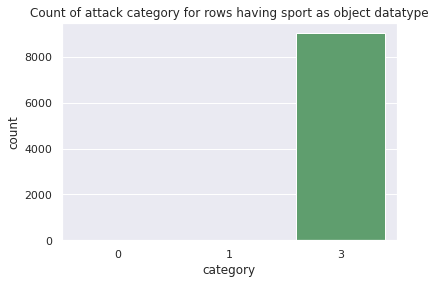

In [ ]:
import seaborn as sns
sns.set_theme(style="darkgrid")
plt.title('Count of attack category for rows having sport as object datatype')
ax = sns.countplot(x="category", data=df4)


INFERENCE: rows containg string in sport ends up with category 3(Reconnaissance) type attack

In [ ]:
import string
df4 = pd.DataFrame()

for i in string.ascii_lowercase:
     df1 = df[df['dport'].str.contains(i)]
     
    
     if(df1.size>0):
         frames = [df1, df4]
  
         df4 = pd.concat(frames)
         #print(df1['category'])
df4


,pkSeqID,proto,sport,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,category,subcategory
149,3606493,1,0x0303,0x0c80,11703,0.0,43,0.0,5,0.0,11,0.0,0.000000,0.0,1,3,Service_Scan
399,3608842,1,0x0303,0x42e0,14203,0.0,42,0.0,5,0.0,11,0.0,0.000000,0.0,1,3,Service_Scan
599,3603747,1,0x0303,0x697a,8774,0.0,42,0.0,5,0.0,10,0.0,0.000000,0.0,1,3,Service_Scan
703,3642170,1,0x0303,0x0102,18814,0.0,44,0.0,5,0.0,13,0.0,0.001345,0.0,1,3,Service_Scan
1132,3606542,1,0x0303,0x0db4,11755,0.0,42,0.0,5,0.0,11,0.0,0.000000,0.0,1,3,Service_Scan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722163,3642073,1,0x0303,0x2f4a,18710,0.0,38,0.0,5,0.0,11,0.0,0.004843,0.0,1,3,Service_Scan
722623,3600724,1,0x0303,0x9eac,5552,0.0,43,0.0,5,0.0,11,0.0,0.000000,0.0,1,3,Service_Scan
725859,3607534,1,0x0303,0xa146,12810,0.0,42,0.0,5,0.0,10,0.0,0.000000,0.0,1,3,Service_Scan
728396,3659036,1,0x0303,0x3da6,37192,0.0,26,0.0,5,0.0,8,0.0,0.000000,0.0,1,3,Service_Scan


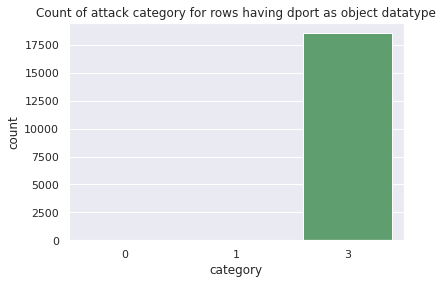

In [ ]:
import seaborn as sns
sns.set_theme(style="darkgrid")
plt.title('Count of attack category for rows having dport as object datatype')
ax = sns.countplot(x="category", data=df4)

INFERENCE: rows containg string in dport ends up with category 3(Reconnaissance) type attack

Hence all rows containg string in features sport and dport end up with Reconnaissance attack , hence it can be encoded with a negetive to help model in its prediction

In [ ]:
import string
for i in string.ascii_lowercase:
    
    df.loc[(df["sport"].str.contains(i)) | (df["sport"].str.contains("b"))| (df["sport"].str.contains("b")),["sport"]]=-8999
     
    df.loc[(df["dport"].str.contains(i)) | (df["dport"].str.contains("b"))| (df["dport"].str.contains("b")),["dport"]]=-8999
df

,pkSeqID,proto,sport,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,category,subcategory
0,3142762,4,6551,80,251984,1.900363,100,0.000000,4,2.687519,100,0.000000,0.494549,4.031619,1,0,UDP
1,2432264,3,5532,80,256724,0.078003,38,3.856930,3,3.934927,100,0.000000,0.256493,4.012924,1,0,TCP
2,1976315,3,27165,80,62921,0.268666,100,2.974100,3,3.341429,100,0.000000,0.294880,3.609205,1,0,TCP
3,1240757,4,48719,80,99168,1.823185,63,0.000000,4,3.222832,63,0.000000,0.461435,4.942302,1,1,UDP
4,3257991,4,22461,80,105063,0.822418,100,2.979995,4,3.983222,100,0.000000,1.002999,4.994452,1,0,UDP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733700,1571905,4,17412,80,168162,1.743940,39,0.000000,4,3.020449,39,0.000000,0.224603,4.043432,1,1,UDP
733701,2787099,4,932,80,158482,0.694618,65,3.002272,4,3.905409,100,0.000000,0.875121,4.691634,1,0,UDP
733702,2255382,3,47980,80,79841,1.744651,53,0.000000,1,2.464288,100,0.278496,0.472773,3.802142,1,0,TCP
733703,588946,3,25096,80,63165,0.000000,100,0.000000,3,0.000000,100,0.000000,0.070461,0.000000,1,1,TCP


In [ ]:
t=df
df

,pkSeqID,proto,sport,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,category,subcategory
0,3142762,4,6551,80,251984,1.900363,100,0.000000,4,2.687519,100,0.000000,0.494549,4.031619,1,0,UDP
1,2432264,3,5532,80,256724,0.078003,38,3.856930,3,3.934927,100,0.000000,0.256493,4.012924,1,0,TCP
2,1976315,3,27165,80,62921,0.268666,100,2.974100,3,3.341429,100,0.000000,0.294880,3.609205,1,0,TCP
3,1240757,4,48719,80,99168,1.823185,63,0.000000,4,3.222832,63,0.000000,0.461435,4.942302,1,1,UDP
4,3257991,4,22461,80,105063,0.822418,100,2.979995,4,3.983222,100,0.000000,1.002999,4.994452,1,0,UDP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733700,1571905,4,17412,80,168162,1.743940,39,0.000000,4,3.020449,39,0.000000,0.224603,4.043432,1,1,UDP
733701,2787099,4,932,80,158482,0.694618,65,3.002272,4,3.905409,100,0.000000,0.875121,4.691634,1,0,UDP
733702,2255382,3,47980,80,79841,1.744651,53,0.000000,1,2.464288,100,0.278496,0.472773,3.802142,1,0,TCP
733703,588946,3,25096,80,63165,0.000000,100,0.000000,3,0.000000,100,0.000000,0.070461,0.000000,1,1,TCP


AFTER REPLACING STRINGS IN sport & dport converting them to int

In [ ]:
df['sport']=df['sport'].astype(int)
df

,pkSeqID,proto,sport,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,category,subcategory
0,3142762,4,6551,80,251984,1.900363,100,0.000000,4,2.687519,100,0.000000,0.494549,4.031619,1,0,UDP
1,2432264,3,5532,80,256724,0.078003,38,3.856930,3,3.934927,100,0.000000,0.256493,4.012924,1,0,TCP
2,1976315,3,27165,80,62921,0.268666,100,2.974100,3,3.341429,100,0.000000,0.294880,3.609205,1,0,TCP
3,1240757,4,48719,80,99168,1.823185,63,0.000000,4,3.222832,63,0.000000,0.461435,4.942302,1,1,UDP
4,3257991,4,22461,80,105063,0.822418,100,2.979995,4,3.983222,100,0.000000,1.002999,4.994452,1,0,UDP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733700,1571905,4,17412,80,168162,1.743940,39,0.000000,4,3.020449,39,0.000000,0.224603,4.043432,1,1,UDP
733701,2787099,4,932,80,158482,0.694618,65,3.002272,4,3.905409,100,0.000000,0.875121,4.691634,1,0,UDP
733702,2255382,3,47980,80,79841,1.744651,53,0.000000,1,2.464288,100,0.278496,0.472773,3.802142,1,0,TCP
733703,588946,3,25096,80,63165,0.000000,100,0.000000,3,0.000000,100,0.000000,0.070461,0.000000,1,1,TCP


In [ ]:
df['dport']=df['dport'].astype(int)
df

,pkSeqID,proto,sport,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,category,subcategory
0,3142762,4,6551,80,251984,1.900363,100,0.000000,4,2.687519,100,0.000000,0.494549,4.031619,1,0,UDP
1,2432264,3,5532,80,256724,0.078003,38,3.856930,3,3.934927,100,0.000000,0.256493,4.012924,1,0,TCP
2,1976315,3,27165,80,62921,0.268666,100,2.974100,3,3.341429,100,0.000000,0.294880,3.609205,1,0,TCP
3,1240757,4,48719,80,99168,1.823185,63,0.000000,4,3.222832,63,0.000000,0.461435,4.942302,1,1,UDP
4,3257991,4,22461,80,105063,0.822418,100,2.979995,4,3.983222,100,0.000000,1.002999,4.994452,1,0,UDP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733700,1571905,4,17412,80,168162,1.743940,39,0.000000,4,3.020449,39,0.000000,0.224603,4.043432,1,1,UDP
733701,2787099,4,932,80,158482,0.694618,65,3.002272,4,3.905409,100,0.000000,0.875121,4.691634,1,0,UDP
733702,2255382,3,47980,80,79841,1.744651,53,0.000000,1,2.464288,100,0.278496,0.472773,3.802142,1,0,TCP
733703,588946,3,25096,80,63165,0.000000,100,0.000000,3,0.000000,100,0.000000,0.070461,0.000000,1,1,TCP


In [ ]:
df

,pkSeqID,proto,sport,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,attack,category,subcategory
0,3142762,4,6551,80,251984,1.900363,100,0.000000,4,2.687519,100,0.000000,0.494549,4.031619,1,0,UDP
1,2432264,3,5532,80,256724,0.078003,38,3.856930,3,3.934927,100,0.000000,0.256493,4.012924,1,0,TCP
2,1976315,3,27165,80,62921,0.268666,100,2.974100,3,3.341429,100,0.000000,0.294880,3.609205,1,0,TCP
3,1240757,4,48719,80,99168,1.823185,63,0.000000,4,3.222832,63,0.000000,0.461435,4.942302,1,1,UDP
4,3257991,4,22461,80,105063,0.822418,100,2.979995,4,3.983222,100,0.000000,1.002999,4.994452,1,0,UDP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733700,1571905,4,17412,80,168162,1.743940,39,0.000000,4,3.020449,39,0.000000,0.224603,4.043432,1,1,UDP
733701,2787099,4,932,80,158482,0.694618,65,3.002272,4,3.905409,100,0.000000,0.875121,4.691634,1,0,UDP
733702,2255382,3,47980,80,79841,1.744651,53,0.000000,1,2.464288,100,0.278496,0.472773,3.802142,1,0,TCP
733703,588946,3,25096,80,63165,0.000000,100,0.000000,3,0.000000,100,0.000000,0.070461,0.000000,1,1,TCP


In [ ]:

#df=df.drop(['subcategory'],axis=1)

In [ ]:

df=df.drop(['attack'],axis=1)

In [ ]:
df.dtypes

pkSeqID                int64
proto                  int64
sport                  int64
dport                  int64
seq                    int64
stddev               float64
N_IN_Conn_P_SrcIP      int64
min                  float64
state_number           int64
mean                 float64
N_IN_Conn_P_DstIP      int64
drate                float64
srate                float64
max                  float64
category               int64
subcategory           object
dtype: object

ALL FEATURES ARE INTEGER AND FLOAT

In [ ]:
df

,pkSeqID,proto,sport,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,category,subcategory
0,3142762,4,6551,80,251984,1.900363,100,0.000000,4,2.687519,100,0.000000,0.494549,4.031619,0,UDP
1,2432264,3,5532,80,256724,0.078003,38,3.856930,3,3.934927,100,0.000000,0.256493,4.012924,0,TCP
2,1976315,3,27165,80,62921,0.268666,100,2.974100,3,3.341429,100,0.000000,0.294880,3.609205,0,TCP
3,1240757,4,48719,80,99168,1.823185,63,0.000000,4,3.222832,63,0.000000,0.461435,4.942302,1,UDP
4,3257991,4,22461,80,105063,0.822418,100,2.979995,4,3.983222,100,0.000000,1.002999,4.994452,0,UDP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733700,1571905,4,17412,80,168162,1.743940,39,0.000000,4,3.020449,39,0.000000,0.224603,4.043432,1,UDP
733701,2787099,4,932,80,158482,0.694618,65,3.002272,4,3.905409,100,0.000000,0.875121,4.691634,0,UDP
733702,2255382,3,47980,80,79841,1.744651,53,0.000000,1,2.464288,100,0.278496,0.472773,3.802142,0,TCP
733703,588946,3,25096,80,63165,0.000000,100,0.000000,3,0.000000,100,0.000000,0.070461,0.000000,1,TCP


MIN MAX SCALING ( FOR DISTANCE BASED ALGORITHMS)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
df[["pkSeqID", "proto",'sport','dport','N_IN_Conn_P_SrcIP','min','max','N_IN_Conn_P_DstIP','drate','srate','mean','state_number','seq']] = min_max_scaler.fit_transform(df[["pkSeqID", "proto",'sport','dport','N_IN_Conn_P_SrcIP','min','max','N_IN_Conn_P_DstIP','drate','srate','mean','state_number','seq']])
df

,pkSeqID,proto,sport,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,mean,N_IN_Conn_P_DstIP,drate,srate,max,category,subcategory
0,0.856683,1.00,0.208630,0.12181,0.960993,1.900363,1.000000,0.000000,0.3,0.539459,1.000000,0.000000,4.945490e-07,0.806324,0,UDP
1,0.663009,0.75,0.194958,0.12181,0.979070,0.078003,0.373737,0.774411,0.2,0.789847,1.000000,0.000000,2.564930e-07,0.802585,0,TCP
2,0.538722,0.75,0.485201,0.12181,0.239959,0.268666,1.000000,0.597152,0.2,0.670716,1.000000,0.000000,2.948800e-07,0.721841,0,TCP
3,0.338217,1.00,0.774385,0.12181,0.378195,1.823185,0.626263,0.000000,0.3,0.646911,0.626263,0.000000,4.614350e-07,0.988461,1,UDP
4,0.888094,1.00,0.422089,0.12181,0.400677,0.822418,1.000000,0.598336,0.3,0.799542,1.000000,0.000000,1.002999e-06,0.998891,0,UDP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
733700,0.428484,1.00,0.354348,0.12181,0.641319,1.743940,0.383838,0.000000,0.3,0.606287,0.383838,0.000000,2.246030e-07,0.808687,1,UDP
733701,0.759733,1.00,0.133241,0.12181,0.604403,0.694618,0.646465,0.602809,0.3,0.783922,1.000000,0.000000,8.751210e-07,0.938327,0,UDP
733702,0.614793,0.75,0.764470,0.12181,0.304488,1.744651,0.525253,0.000000,0.0,0.494650,1.000000,0.000005,4.727730e-07,0.760429,0,TCP
733703,0.160540,0.75,0.457442,0.12181,0.240890,0.000000,1.000000,0.000000,0.2,0.000000,1.000000,0.000000,7.046100e-08,0.000000,1,TCP


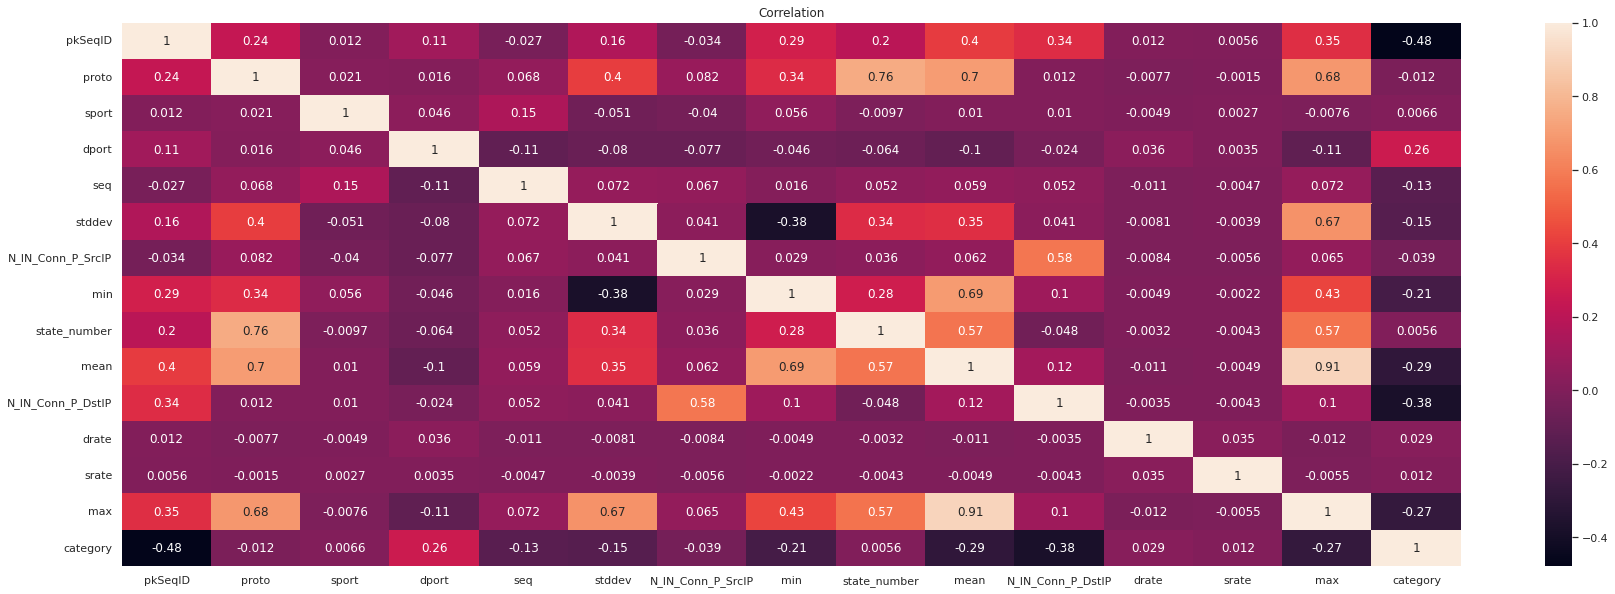

In [ ]:
import seaborn as sns
plt.figure(figsize=(30,10))
plt.title('Correlation')

  
#ploting the heatmap for correlation
sns.heatmap(df.corr(),annot=True )

Label encoding subcategory

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['subcategory']= label_encoder.fit_transform(df['subcategory'])
dic = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(dic)

{'Data_Exfiltration': 0, 'HTTP': 1, 'Keylogging': 2, 'Normal': 3, 'OS_Fingerprint': 4, 'Service_Scan': 5, 'TCP': 6, 'UDP': 7}


In [ ]:
x=df.drop(['subcategory'],axis='columns')

TARGET VARIBLE ASSIGNED

In [ ]:
x=df.drop(['category','subcategory','mean'],axis='columns')
y=df.category

In [ ]:
x

,pkSeqID,proto,sport,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,N_IN_Conn_P_DstIP,drate,srate,max
0,0.856683,1.00,0.208630,0.12181,0.960993,1.900363,1.000000,0.000000,0.3,1.000000,0.000000,4.945490e-07,0.806324
1,0.663009,0.75,0.194958,0.12181,0.979070,0.078003,0.373737,0.774411,0.2,1.000000,0.000000,2.564930e-07,0.802585
2,0.538722,0.75,0.485201,0.12181,0.239959,0.268666,1.000000,0.597152,0.2,1.000000,0.000000,2.948800e-07,0.721841
3,0.338217,1.00,0.774385,0.12181,0.378195,1.823185,0.626263,0.000000,0.3,0.626263,0.000000,4.614350e-07,0.988461
4,0.888094,1.00,0.422089,0.12181,0.400677,0.822418,1.000000,0.598336,0.3,1.000000,0.000000,1.002999e-06,0.998891
...,...,...,...,...,...,...,...,...,...,...,...,...,...
733700,0.428484,1.00,0.354348,0.12181,0.641319,1.743940,0.383838,0.000000,0.3,0.383838,0.000000,2.246030e-07,0.808687
733701,0.759733,1.00,0.133241,0.12181,0.604403,0.694618,0.646465,0.602809,0.3,1.000000,0.000000,8.751210e-07,0.938327
733702,0.614793,0.75,0.764470,0.12181,0.304488,1.744651,0.525253,0.000000,0.0,1.000000,0.000005,4.727730e-07,0.760429
733703,0.160540,0.75,0.457442,0.12181,0.240890,0.000000,1.000000,0.000000,0.2,1.000000,0.000000,7.046100e-08,0.000000


TEST TRAIN SPLIT

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(x, y, train_size=len(train)/(len(dfn)+len(train)), random_state=1)
print(len(x_train), len(x_test))

2934817 733705


RANDOM SAMPLING

In [ ]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler 
from imblearn.over_sampling import RandomOverSampler 

print('Original dataset shape %s' % Counter(y_train))

Original dataset shape Counter({0: 1540915, 1: 1320486, 3: 72970, 2: 385, 4: 61})


In [ ]:
X=x_train
y=y_train

In [ ]:
# check version number
import imblearn
from imblearn.over_sampling import SMOTE
strategy = {0:1540915, 1:1320486, 2:72970, 3:72970, 4:72970}
oversample = SMOTE(sampling_strategy=strategy)
X, y = oversample.fit_resample(X, y)

ValueError: ignored

In [ ]:
rus = RandomUnderSampler(random_state=42,sampling_strategy='all')

X_res, y_res = rus.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))


Resampled dataset shape Counter({0: 61, 1: 61, 2: 61, 3: 61, 4: 61})


In [ ]:
x_train

,pkSeqID,proto,sport,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,N_IN_Conn_P_DstIP,drate,srate,max
1037832,0.708495,0.75,0.572356,0.12181,0.615687,0.131156,1.000000,0.000000,0.0,1.000000,1.398029e-06,1.775800e-07,0.070007
2374999,0.632391,0.75,0.630182,0.12181,0.550694,0.047550,0.929293,0.702480,0.2,1.000000,0.000000e+00,2.824340e-07,0.718757
262161,0.470881,0.75,0.440980,0.12181,0.290590,0.139486,1.000000,0.000000,0.0,1.000000,0.000000e+00,1.906480e-07,0.055794
223739,0.880175,1.00,0.145491,0.12181,0.289896,1.414593,1.000000,0.398002,0.3,1.000000,0.000000e+00,1.003361e-06,0.999678
1161073,0.238758,1.00,0.984088,0.12181,0.986278,0.059979,1.000000,0.829579,0.3,1.000000,0.000000e+00,2.385580e-07,0.850331
...,...,...,...,...,...,...,...,...,...,...,...,...,...
836489,0.693762,0.75,0.513041,0.12181,0.409571,0.062209,0.353535,0.000000,0.6,1.000000,0.000000e+00,1.028710e-07,0.031104
491263,0.050470,0.75,0.684815,0.12181,0.700478,0.000000,1.000000,0.000000,0.2,1.000000,0.000000e+00,1.157410e-07,0.000000
2568076,0.811353,1.00,0.970430,0.12181,0.326794,0.632932,1.000000,0.554698,0.3,1.000000,0.000000e+00,7.290540e-07,0.821521
491755,0.451950,0.75,0.207154,0.12181,0.025727,0.106512,0.888889,0.002103,0.0,1.000000,1.885759e-06,3.247300e-07,0.044700


In [ ]:
rus = RandomUnderSampler(random_state=42,sampling_strategy='all')
X_res, y_res = rus.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 72970, 1: 72970, 2: 72970, 3: 72970, 4: 72970})


In [ ]:
X_res

,pkSeqID,proto,sport,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,N_IN_Conn_P_DstIP,drate,srate,max
0,0.512983,0.75,0.841187,0.121810,0.879627,0.000000,1.000000,0.069191,0.0,1.000000,0.000000,2.901890e-06,0.068921
1,0.518404,0.75,0.998967,0.121810,0.955467,0.000000,0.939394,0.000000,0.2,1.000000,0.000000,0.000000e+00,0.000000
2,0.574543,0.75,0.204068,0.121810,0.741121,0.070219,1.000000,0.779926,0.2,1.000000,0.000000,2.480260e-07,0.804967
3,0.531103,0.75,0.836558,0.121810,0.133343,1.620393,1.000000,0.000000,0.0,1.000000,0.000000,2.684930e-07,0.704553
4,0.510397,0.75,0.868141,0.121810,0.843451,0.000000,0.494949,0.000000,0.2,1.000000,0.000000,0.000000e+00,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
364845,0.999981,0.75,0.695258,0.179219,0.000035,0.000000,0.469825,0.000102,0.0,0.241406,0.000024,1.415838e-06,0.000102
364846,0.999987,0.75,0.697311,0.180213,0.000131,0.000000,0.474747,0.000037,0.0,0.242424,0.000000,0.000000e+00,0.000037
364847,0.999986,0.75,0.697269,0.180213,0.000118,0.000000,0.474747,0.000026,0.0,0.242424,0.000000,0.000000e+00,0.000026
364848,0.999998,0.75,0.591149,0.121032,0.000299,0.000000,0.181818,0.010475,0.0,0.181818,0.027379,1.610541e-03,0.010434


MLP MODEL

In [ ]:
x_train

,pkSeqID,proto,sport,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,N_IN_Conn_P_DstIP,drate,srate,max
1037832,0.708495,0.75,0.572356,0.12181,0.615687,0.131156,1.000000,0.000000,0.0,1.000000,1.398029e-06,1.775800e-07,0.070007
2374999,0.632391,0.75,0.630182,0.12181,0.550694,0.047550,0.929293,0.702480,0.2,1.000000,0.000000e+00,2.824340e-07,0.718757
262161,0.470881,0.75,0.440980,0.12181,0.290590,0.139486,1.000000,0.000000,0.0,1.000000,0.000000e+00,1.906480e-07,0.055794
223739,0.880175,1.00,0.145491,0.12181,0.289896,1.414593,1.000000,0.398002,0.3,1.000000,0.000000e+00,1.003361e-06,0.999678
1161073,0.238758,1.00,0.984088,0.12181,0.986278,0.059979,1.000000,0.829579,0.3,1.000000,0.000000e+00,2.385580e-07,0.850331
...,...,...,...,...,...,...,...,...,...,...,...,...,...
836489,0.693762,0.75,0.513041,0.12181,0.409571,0.062209,0.353535,0.000000,0.6,1.000000,0.000000e+00,1.028710e-07,0.031104
491263,0.050470,0.75,0.684815,0.12181,0.700478,0.000000,1.000000,0.000000,0.2,1.000000,0.000000e+00,1.157410e-07,0.000000
2568076,0.811353,1.00,0.970430,0.12181,0.326794,0.632932,1.000000,0.554698,0.3,1.000000,0.000000e+00,7.290540e-07,0.821521
491755,0.451950,0.75,0.207154,0.12181,0.025727,0.106512,0.888889,0.002103,0.0,1.000000,1.885759e-06,3.247300e-07,0.044700


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras import optimizers


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Dropout
from tensorflow.keras import optimizers, callbacks

In [ ]:
model = Sequential()
model.add(Dense(128, input_shape = (13,), activation = 'relu', kernel_initializer = 'random_uniform'))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Dense(64, activation = 'relu', kernel_initializer = 'random_uniform'))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Dense(64, activation = 'relu', kernel_initializer = 'random_uniform'))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Dense(64, activation = 'relu', kernel_initializer = 'random_uniform'))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Dense(64, activation = 'relu', kernel_initializer = 'random_uniform'))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Dense(10, activation = 'softmax', kernel_initializer = 'random_uniform'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1792      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                        

In [ ]:
model.compile(optimizer = optimizers.SGD(learning_rate = 0.01),loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
earlyStopping = callbacks.EarlyStopping(monitor='loss', patience=5)
chkpnt_path = 'model/model_checkpoint'
modelCheckpoint = callbacks.ModelCheckpoint(filepath=chkpnt_path,save_weights_only=True,monitor='val_accuracy',mode='max',save_best_only=True)

In [ ]:
history=model.fit(x_train, y_train, batch_size = 50, epochs = 5, verbose = 1, validation_split = 0.3, callbacks=[earlyStopping, modelCheckpoint])

Epoch 1/5
41088/41088 [==============================] - 253s 6ms/step - loss: 0.0349 - accuracy: 0.9934 - val_loss: 0.0021 - val_accuracy: 0.9998
Epoch 2/5
41088/41088 [==============================] - 240s 6ms/step - loss: 0.0151 - accuracy: 0.9970 - val_loss: 0.0038 - val_accuracy: 0.9998
Epoch 3/5
41088/41088 [==============================] - 251s 6ms/step - loss: 0.0118 - accuracy: 0.9975 - val_loss: 0.1921 - val_accuracy: 0.9776
Epoch 4/5
41088/41088 [==============================] - 253s 6ms/step - loss: 0.0116 - accuracy: 0.9977 - val_loss: 0.0032 - val_accuracy: 0.9998
Epoch 5/5
41088/41088 [==============================] - 250s 6ms/step - loss: 0.0123 - accuracy: 0.9975 - val_loss: 0.0060 - val_accuracy: 0.9998


In [ ]:
model.evaluate(x_test, y_test)

22929/22929 [==============================] - 53s 2ms/step - loss: 0.0060 - accuracy: 0.9998


[0.006040062289685011, 0.9998214244842529]

In [ ]:
import matplotlib.pyplot as plt
def plot_loss_hist(history):
  plt.plot(history.history['loss'])
  #plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  #plt.legend(['train', 'test'], loc='upper left')
  plt.show()

def plot_acc_hist(history):
  plt.plot(history.history['accuracy'])
  #plt.plot(history.history['val_loss'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  #plt.legend(['train', 'test'], loc='upper left')
  plt.show()

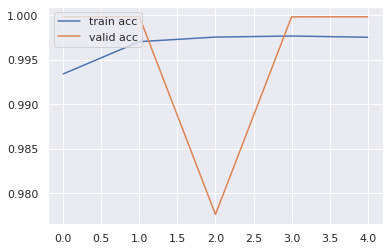

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.legend(['train acc','valid acc'],loc='upper left')
plt.show()

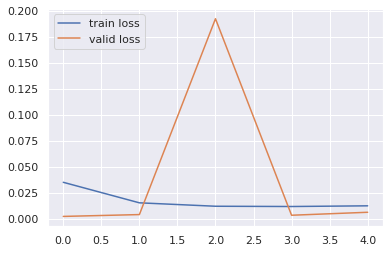

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train loss','valid loss'],loc='upper left')
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
t = model.predict(x_test)
t = np.argmax(t, axis=1)
cm = confusion_matrix(y_test, t)
cm

array([[385708,      0,      0,      1,      0],
       [    10, 329764,      0,      0,      0],
       [     7,      0,      0,     85,      0],
       [    10,      0,      0,  18102,      0],
       [     1,      0,      0,     17,      0]])

In [ ]:
#predicted_labels = model.predict(x_test)
cnf_matrix = cm
FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix) 
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
TPR = TP/(TP+FN)
TNR = TN/(TN+FP) 
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)
FPR = FP/(FP+TN)
FNR = FN/(TP+FN)
FDR = FP/(TP+FP)
ACC = (TP+TN)/(TP+FP+FN+TN)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide


In [ ]:
print('{:f}'.format(FPR[0]))
print('{:f}'.format(FPR[1]))
print('{:f}'.format(FPR[2]))
print('{:f}'.format(FPR[3]))
print('{:f}'.format(FPR[4]))
 

0.000080
0.000000
0.000000
0.000144
0.000000


In [ ]:
model = Sequential()
model.add(Dense(128, input_shape = (13,), activation = 'relu', kernel_initializer = 'random_uniform'))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Dense(64, activation = 'relu', kernel_initializer = 'random_uniform'))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Dense(64, activation = 'relu', kernel_initializer = 'random_uniform'))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Dense(64, activation = 'relu', kernel_initializer = 'random_uniform'))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Dense(64, activation = 'relu', kernel_initializer = 'random_uniform'))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Dense(10, activation = 'softmax', kernel_initializer = 'random_uniform'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               1792      
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 batch_normalization_5 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 batch_normalization_6 (Batc  (None, 64)               256       
 hNormalization)                                      

In [ ]:
model.compile(optimizer = optimizers.SGD(learning_rate = 0.01),loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
earlyStopping = callbacks.EarlyStopping(monitor='loss', patience=5)
chkpnt_path = 'model/model_checkpoint'
modelCheckpoint = callbacks.ModelCheckpoint(filepath=chkpnt_path,save_weights_only=True,monitor='val_accuracy',mode='max',save_best_only=True)

In [ ]:
history=model.fit(X_res, y_res, batch_size = 50, epochs = 5, verbose = 1, validation_split = 0.3, callbacks=[earlyStopping, modelCheckpoint])

Epoch 1/5
5108/5108 [==============================] - 33s 6ms/step - loss: 0.1565 - accuracy: 0.9645 - val_loss: 5.3060 - val_accuracy: 0.3292
Epoch 2/5
5108/5108 [==============================] - 31s 6ms/step - loss: 0.0593 - accuracy: 0.9866 - val_loss: 5.6364 - val_accuracy: 0.3302
Epoch 3/5
5108/5108 [==============================] - 30s 6ms/step - loss: 0.0461 - accuracy: 0.9901 - val_loss: 5.7649 - val_accuracy: 0.3311
Epoch 4/5
5108/5108 [==============================] - 31s 6ms/step - loss: 0.0393 - accuracy: 0.9916 - val_loss: 5.8573 - val_accuracy: 0.3314
Epoch 5/5
5108/5108 [==============================] - 31s 6ms/step - loss: 0.0326 - accuracy: 0.9932 - val_loss: 6.3084 - val_accuracy: 0.3314


In [ ]:
x_test

,pkSeqID,proto,sport,dport,seq,stddev,N_IN_Conn_P_SrcIP,min,state_number,N_IN_Conn_P_DstIP,drate,srate,max
680237,0.221222,1.00,0.856535,0.121810,0.740938,0.333764,1.000000,0.770214,0.3,1.0,0.0,4.108600e-07,0.943856
912034,0.483034,0.75,0.643223,0.121810,0.460621,2.296951,0.393939,0.000000,0.2,1.0,0.0,1.421010e-07,0.918780
2576453,0.602042,0.75,0.318016,0.121810,0.126089,1.732068,0.252525,0.000000,0.0,1.0,0.0,3.593040e-07,0.749672
158995,0.975766,0.75,0.780879,0.135683,0.008932,0.000000,1.000000,0.000014,0.0,1.0,0.0,0.000000e+00,0.000014
86970,0.793526,1.00,0.730673,0.121810,0.077373,0.911956,1.000000,0.590063,0.3,1.0,0.0,1.024332e-06,0.977141
...,...,...,...,...,...,...,...,...,...,...,...,...,...
315815,0.864003,1.00,0.799152,0.121810,0.063636,0.949134,0.929293,0.596063,0.3,1.0,0.0,1.003509e-06,0.997755
1955082,0.606225,0.75,0.689175,0.121810,0.184611,1.700006,0.575758,0.000000,0.0,1.0,0.0,3.768780e-07,0.731444
1525165,0.691363,0.75,0.138299,0.121810,0.376006,1.239210,1.000000,0.000000,0.0,1.0,0.0,9.647500e-08,0.553005
366763,0.956794,1.00,0.969598,0.121810,0.362071,1.003553,1.000000,0.394192,0.3,1.0,0.0,4.207730e-07,0.824890


In [ ]:
model.evaluate(x_test, y_test)

22929/22929 [==============================] - 54s 2ms/step - loss: 9.9164 - accuracy: 4.5250e-04


[9.916388511657715, 0.00045249794493429363]

In [ ]:
import matplotlib.pyplot as plt
def plot_loss_hist(history):
  plt.plot(history.history['loss'])
  #plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  #plt.legend(['train', 'test'], loc='upper left')
  plt.show()

def plot_acc_hist(history):
  plt.plot(history.history['accuracy'])
  #plt.plot(history.history['val_loss'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  #plt.legend(['train', 'test'], loc='upper left')
  plt.show()

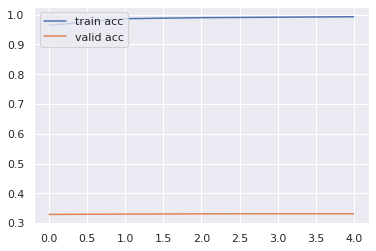

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.legend(['train acc','valid acc'],loc='upper left')
plt.show()

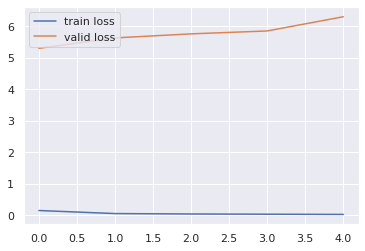

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train loss','valid loss'],loc='upper left')
plt.show()

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
t = model.predict(x_test)
t = np.argmax(t, axis=1)
cm = confusion_matrix(y_test, t)
fig, ax = plt.subplots(figsize=(13,7))     
sns.heatmap(cm, annot =True,fmt='g')

array([[     0,      0,      3,      0,      0,      0,      0,      0],
       [   201,    317,      0,      1,      0,      0,      0,      0],
       [     0,      0,     15,      0,      0,      0,      0,      0],
       [     0,      0,     92,      0,      0,      0,      0,      0],
       [     2,      0,     17,   3470,      0,      0,      0,      0],
       [     0,      0,     90,  14533,      0,      0,      0,      0],
       [195744, 122945,     47,     12,      0,      0,      0,      0],
       [189706, 206506,      3,      1,      0,      0,      0,      0]])

In [ ]:
#predicted_labels = model.predict(x_test)
cnf_matrix = cm
FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix) 
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
TPR = TP/(TP+FN)
TNR = TN/(TN+FP) 
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)
FPR = FP/(FP+TN)
FNR = FN/(TP+FN)
FDR = FP/(TP+FP)
ACC = (TP+TN)/(TP+FP+FN+TN)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide


In [ ]:
print('{:f}'.format(FPR[0]))
print('{:f}'.format(FPR[1]))
print('{:f}'.format(FPR[2]))
print('{:f}'.format(FPR[3]))
print('{:f}'.format(FPR[4]))
 

0.000080
0.000000
0.000000
0.000144
0.000000


In [ ]:
'''import tensorflow as tf
tf.random.set_seed(42)
import cv2


from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV'''


'import tensorflow as tf\ntf.random.set_seed(42)\nimport cv2\n\n\nfrom tensorflow.keras.wrappers.scikit_learn import KerasClassifier\nfrom sklearn.model_selection import RandomizedSearchCV'

In [ ]:
'''model = Sequential()
# define a grid of the hyperparameter search space
hiddenLayerOne = [256, 512, 784]
hiddenLayerTwo = [128, 256, 512]'''

'model = Sequential()\n# define a grid of the hyperparameter search space\nhiddenLayerOne = [256, 512, 784]\nhiddenLayerTwo = [128, 256, 512]'

In [ ]:
''''ropout =  [0.4, 0.5]
learnRate = [1e-2, 1e-3, 1e-4]
batchSize = [25,50]
epochs = [2,3]'''''

"'ropout =  [0.4, 0.5]\nlearnRate = [1e-2, 1e-3, 1e-4]\nbatchSize = [25,50]\nepochs = [2,3]"

In [ ]:
'''grid = dict(
	hiddenLayerOne=hiddenLayerOne,
	learnRate=learnRate,
	hiddenLayerTwo=hiddenLayerTwo,
	dropout=dropout,
	batch_size=batchSize,
	epochs=epochs
)'''

'grid = dict(\n\thiddenLayerOne=hiddenLayerOne,\n\tlearnRate=learnRate,\n\thiddenLayerTwo=hiddenLayerTwo,\n\tdropout=dropout,\n\tbatch_size=batchSize,\n\tepochs=epochs\n)'

MODEL CREATION 
DECISION TREEE

In [ ]:
from sklearn import tree
model=tree.DecisionTreeClassifier(criterion="entropy")

In [ ]:
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

CONFUSION  MATRIX

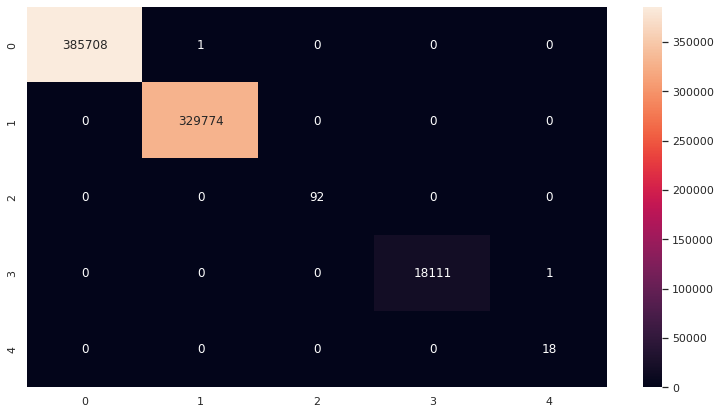

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred=model.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(13,7))     
sns.heatmap(cm, annot =True,fmt='g')

In [ ]:
import sklearn.metrics as metrics
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [ ]:
print("Classification Metrices : ")
print("Accuracy:",accuracy_score(y_test, y_pred))
dt_a = accuracy_score(y_test, y_pred)
print("F1 Score:",f1_score(y_test, y_pred, average='weighted'))
dt_f = f1_score(y_test, y_pred, average='weighted')
print("Precision: ",precision_score(y_test,y_pred, average='weighted'))
dt_p = precision_score(y_test,y_pred, average='weighted')
print("Recall: ",recall_score(y_test,y_pred,average = 'weighted'))
dt_r = recall_score(y_test,y_pred,average = 'weighted')

Classification Metrices : 
Accuracy: 0.9999972741088039
F1 Score: 0.9999972925083243
Precision:  0.9999973458469158
Recall:  0.9999972741088039


KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

error1=[]
error2=[]
for k in range(1,15):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train,y_train)
  y_pred1 = knn.predict(x_train)
  error1.append(np.mean(y_train!=y_pred1))
  y_pred2 = knn.predict(x_test)
  error2.append(np.mean(y_test!=y_pred2))
plt.plot(range(1,15),error1,label='train')
plt.plot(range(1,15),error2,label='test')
plt.xlabel('K - Value')
plt.ylabel('Error')
plt.legend()

I have used previous code to select k value for which test train error is low ie k=2

In [ ]:
"""error1=[]
error2=[]
for k in range(1,15):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train,y_train)
  y_pred1 = knn.predict(x_train)
  error1.append(np.mean(y_train!=y_pred1))
  y_pred2 = knn.predict(x_test)
  error2.append(np.mean(y_test!=y_pred2))
plt.plot(range(1,15),error1,label='train')
plt.plot(range(1,15),error2,label='test')
plt.xlabel('K - Value')
plt.ylabel('Error')
plt.legend()"""
# I have commneted it because it takes certain amount of time to run 

"error1=[]\nerror2=[]\nfor k in range(1,15):\n  knn = KNeighborsClassifier(n_neighbors=k)\n  knn.fit(x_train,y_train)\n  y_pred1 = knn.predict(x_train)\n  error1.append(np.mean(y_train!=y_pred1))\n  y_pred2 = knn.predict(x_test)\n  error2.append(np.mean(y_test!=y_pred2))\nplt.plot(range(1,15),error1,label='train')\nplt.plot(range(1,15),error2,label='test')\nplt.xlabel('K - Value')\nplt.ylabel('Error')\nplt.legend()"

In [ ]:
knn=KNeighborsClassifier(n_neighbors=2,n_jobs=10)

In [ ]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_jobs=10, n_neighbors=2)

CONFUSION MATRIX

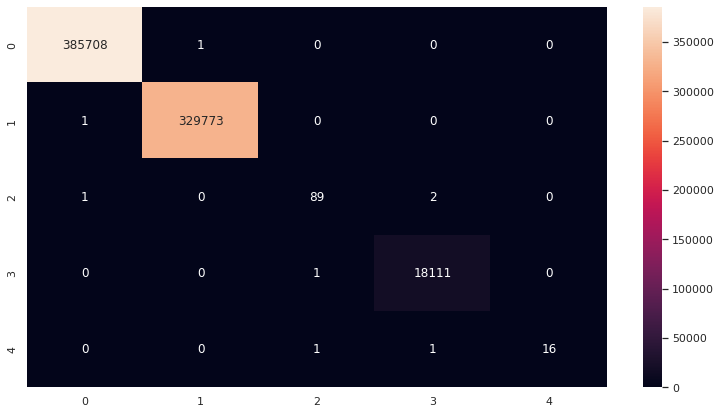

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred=knn.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(13,7))     
sns.heatmap(cm, annot =True,fmt='g')

In [ ]:
print("Classification Metrices : ")
print("Accuracy:",accuracy_score(y_test, y_pred))
knn_a = accuracy_score(y_test, y_pred)
print("F1 Score:",f1_score(y_test, y_pred, average='weighted'))
knn_f = f1_score(y_test, y_pred, average='weighted')
print("Precision: ",precision_score(y_test,y_pred, average='weighted'))
knn_p = precision_score(y_test,y_pred, average='weighted')
print("Recall: ",recall_score(y_test,y_pred,average = 'weighted'))
knn_r = recall_score(y_test,y_pred,average = 'weighted')

Classification Metrices : 
Accuracy: 0.9999890964352158
F1 Score: 0.9999889977956139
Precision:  0.9999890669388907
Recall:  0.9999890964352158


MULTINOMIAL NAIVE BAYES

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nbmodel = MultinomialNB()

In [ ]:
nbmodel.fit(x_train,y_train)

MultinomialNB()

CONFUSION MATRIX

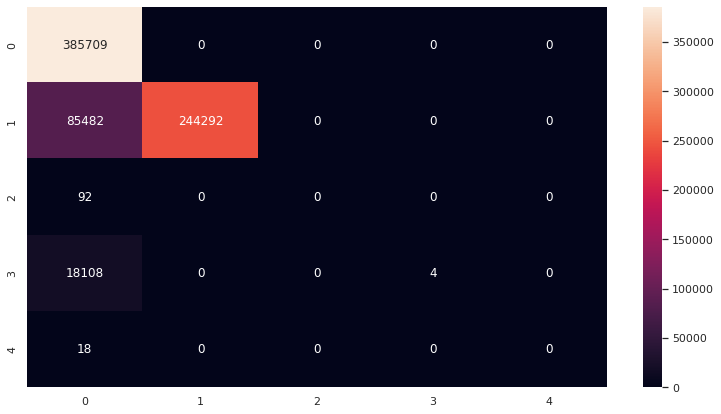

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred=nbmodel.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(13,7))     
sns.heatmap(cm, annot =True,fmt='g')

In [ ]:
print("Classification Metrices : ")
print("Accuracy:",accuracy_score(y_test, y_pred))
nb_a = accuracy_score(y_test, y_pred)
print("F1 Score:",f1_score(y_test, y_pred, average='weighted'))
nb_f = f1_score(y_test, y_pred, average='weighted')
print("Precision: ",precision_score(y_test,y_pred, average='weighted'))
nb_p = precision_score(y_test,y_pred, average='weighted')
print("Recall: ",recall_score(y_test,y_pred,average = 'weighted'))
nb_r = recall_score(y_test,y_pred,average = 'weighted')

Classification Metrices : 
Accuracy: 0.8586625414846566
F1 Score: 0.8459527118881913


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision:  0.8884603594352884


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall:  0.8586625414846566


HYPER PARAMETER TUNING USING DATA FROM RANDOM SAMPLING

In [ ]:
from sklearn.ensemble import RandomForestClassifier
hyperparameter_space = {'max_depth':[2,5], 
                        }
rfc=RandomForestClassifier(random_state=42)
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(rfc, param_grid=hyperparameter_space, 
                  scoring="accuracy",
                  n_jobs=-1, cv=10, return_train_score=True)

gs.fit(x_train,y_train)
print("Optimal hyperparameter combination:", gs.best_params_)


Optimal hyperparameter combination: {'max_depth': 5}


RANDOM FOREST

In [ ]:
#random forest
from sklearn.ensemble import RandomForestClassifier
classifer_rf=RandomForestClassifier(random_state=42,n_jobs=-1,max_depth=5,n_estimators=100,oob_score=True)

In [ ]:
classifer_rf.fit(X_res,y_res)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [ ]:
classifer_rf.score(x_test,y_test)

0.999587027483798

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred=classifer_rf.predict(x_test)
cm=confusion_matrix(y_test,y_pred)

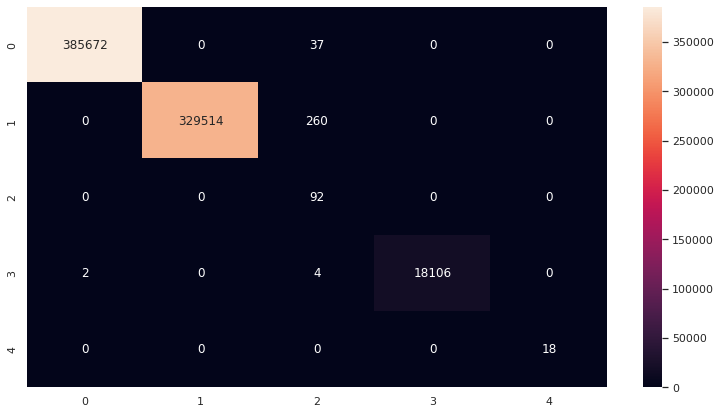

In [ ]:
fig, ax = plt.subplots(figsize=(13,7))     
sns.heatmap(cm, annot =True,fmt='g')

Classification metrix

In [ ]:
print("Classification Metrices : ")
print("Accuracy:",accuracy_score(y_test, y_pred))
rf_a = accuracy_score(y_test, y_pred)
print("F1 Score:",f1_score(y_test, y_pred, average='weighted'))
rf_f = f1_score(y_test, y_pred, average='weighted')
print("Precision: ",precision_score(y_test,y_pred, average='weighted'))
rf_p = precision_score(y_test,y_pred, average='weighted')
print("Recall: ",recall_score(y_test,y_pred,average = 'weighted'))
rf_r = recall_score(y_test,y_pred,average = 'weighted')

Classification Metrices : 
Accuracy: 0.999587027483798
F1 Score: 0.9997142590599637
Precision:  0.9999012364835648
Recall:  0.999587027483798


In [ ]:
print("Accuracy for decision tree           -",dt_a)
print("Accuracy for knn                     -",knn_a)
print("Accuracy for multinomail naive bayes -",nb_a)
print("Accuracy for random forest           -",rf_a)
      

Accuracy for decision tree           - 0.9999972741088039
Accuracy for knn                     - 0.9999890964352158
Accuracy for multinomail naive bayes - 0.8586625414846566
Accuracy for random forest           - 0.999587027483798


For SUBCATEGORY AS TARGET VARIABLE

In [ ]:
y=df['subcategory']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(x, y, train_size=len(train)/(len(dfn)+len(train)), random_state=1)
print(len(x_train), len(x_test))

2934817 733705


In [ ]:
from sklearn import tree
model=tree.DecisionTreeClassifier(criterion="entropy")

In [ ]:
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

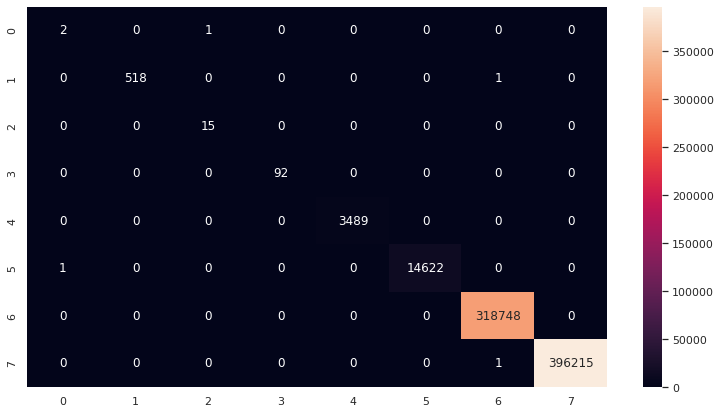

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred=model.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
import seaborn as sns
fig, ax = plt.subplots(figsize=(13,7))     
sns.heatmap(cm, annot =True,fmt='g')

In [ ]:
import sklearn.metrics as metrics
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [ ]:
print("Classification Metrices : ")
print("Accuracy:",accuracy_score(y_test, y_pred))
dt_a = accuracy_score(y_test, y_pred)
print("F1 Score:",f1_score(y_test, y_pred, average='weighted'))
dt_f = f1_score(y_test, y_pred, average='weighted')
print("Precision: ",precision_score(y_test,y_pred, average='weighted'))
dt_p = precision_score(y_test,y_pred, average='weighted')
print("Recall: ",recall_score(y_test,y_pred,average = 'weighted'))
dt_r = recall_score(y_test,y_pred,average = 'weighted')

Classification Metrices : 
Accuracy: 0.9999945482176079
F1 Score: 0.9999945695235573
Precision:  0.9999946334188113
Recall:  0.9999945482176079


KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

error1=[]
error2=[]
for k in range(1,15):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train,y_train)
  y_pred1 = knn.predict(x_train)
  error1.append(np.mean(y_train!=y_pred1))
  y_pred2 = knn.predict(x_test)
  error2.append(np.mean(y_test!=y_pred2))
plt.plot(range(1,15),error1,label='train')
plt.plot(range(1,15),error2,label='test')
plt.xlabel('K - Value')
plt.ylabel('Error')
plt.legend()

I have used previous code to select k value for which test train error is low ie k=2

In [ ]:
"""error1=[]
error2=[]
for k in range(1,15):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train,y_train)
  y_pred1 = knn.predict(x_train)
  error1.append(np.mean(y_train!=y_pred1))
  y_pred2 = knn.predict(x_test)
  error2.append(np.mean(y_test!=y_pred2))
plt.plot(range(1,15),error1,label='train')
plt.plot(range(1,15),error2,label='test')
plt.xlabel('K - Value')
plt.ylabel('Error')
plt.legend()"""
# I have commneted it because it takes certain amount of time to run 

"error1=[]\nerror2=[]\nfor k in range(1,15):\n  knn = KNeighborsClassifier(n_neighbors=k)\n  knn.fit(x_train,y_train)\n  y_pred1 = knn.predict(x_train)\n  error1.append(np.mean(y_train!=y_pred1))\n  y_pred2 = knn.predict(x_test)\n  error2.append(np.mean(y_test!=y_pred2))\nplt.plot(range(1,15),error1,label='train')\nplt.plot(range(1,15),error2,label='test')\nplt.xlabel('K - Value')\nplt.ylabel('Error')\nplt.legend()"

In [ ]:
knn=KNeighborsClassifier(n_neighbors=2,n_jobs=10)

In [ ]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_jobs=10, n_neighbors=2)

CONFUSION MATRIX

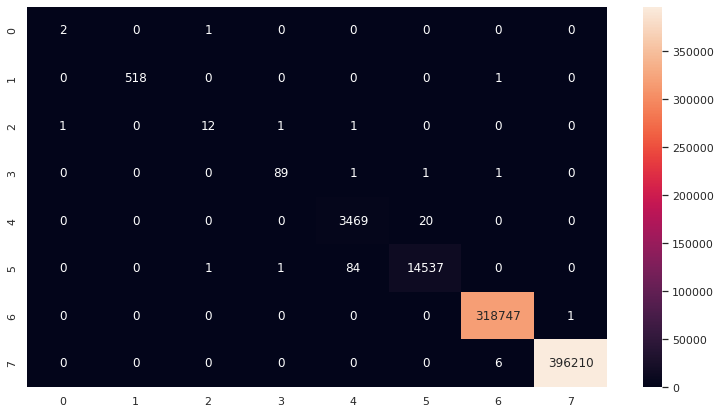

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred=knn.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(13,7))     
sns.heatmap(cm, annot =True,fmt='g')

In [ ]:
print("Classification Metrices : ")
print("Accuracy:",accuracy_score(y_test, y_pred))
knn_a = accuracy_score(y_test, y_pred)
print("F1 Score:",f1_score(y_test, y_pred, average='weighted'))
knn_f = f1_score(y_test, y_pred, average='weighted')
print("Precision: ",precision_score(y_test,y_pred, average='weighted'))
knn_p = precision_score(y_test,y_pred, average='weighted')
print("Recall: ",recall_score(y_test,y_pred,average = 'weighted'))
knn_r = recall_score(y_test,y_pred,average = 'weighted')

Classification Metrices : 
Accuracy: 0.9998350835826388
F1 Score: 0.9998354612547355
Precision:  0.9998369074621166
Recall:  0.9998350835826388


MULTINOMIAL NAIVE BAYES

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nbmodel = MultinomialNB()

In [ ]:
nbmodel.fit(x_train,y_train)

MultinomialNB()

CONFUSION MATRIX

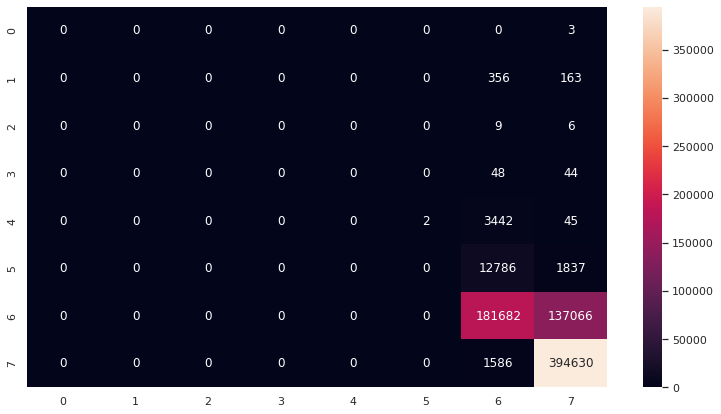

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred=nbmodel.predict(x_test)
cm=confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(13,7))     
sns.heatmap(cm, annot =True,fmt='g')

In [ ]:
print("Classification Metrices : ")
print("Accuracy:",accuracy_score(y_test, y_pred))
nb_a = accuracy_score(y_test, y_pred)
print("F1 Score:",f1_score(y_test, y_pred, average='weighted'))
nb_f = f1_score(y_test, y_pred, average='weighted')
print("Precision: ",precision_score(y_test,y_pred, average='weighted'))
nb_p = precision_score(y_test,y_pred, average='weighted')
print("Recall: ",recall_score(y_test,y_pred,average = 'weighted'))
nb_r = recall_score(y_test,y_pred,average = 'weighted')

Classification Metrices : 
Accuracy: 0.7854819034898222
F1 Score: 0.7626528173439542


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision:  0.7940592861119078


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall:  0.7854819034898222


RANDOM FOREST

In [ ]:
#random forest
from sklearn.ensemble import RandomForestClassifier
classifer_rf=RandomForestClassifier(random_state=42,n_jobs=-1,max_depth=5,n_estimators=100,oob_score=True)

In [ ]:
classifer_rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [ ]:
classifer_rf.score(x_test,y_test)

0.999277638833046

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred=classifer_rf.predict(x_test)
cm=confusion_matrix(y_test,y_pred)

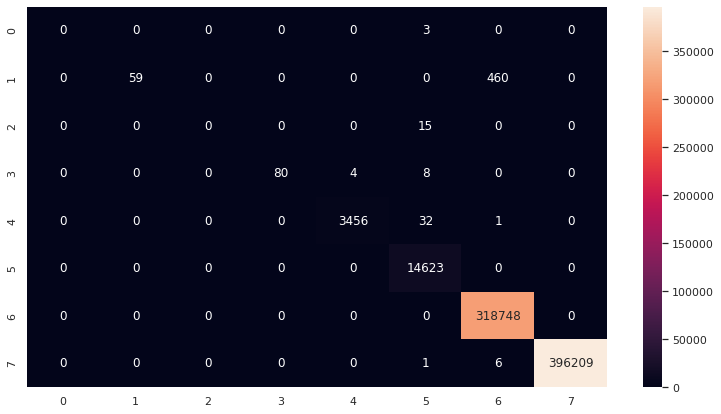

In [ ]:
fig, ax = plt.subplots(figsize=(13,7))     
sns.heatmap(cm, annot =True,fmt='g')

Classification metrics

In [ ]:
print("Classification Metrices : ")
print("Accuracy:",accuracy_score(y_test, y_pred))
rf_a = accuracy_score(y_test, y_pred)
print("F1 Score:",f1_score(y_test, y_pred, average='weighted'))
rf_f = f1_score(y_test, y_pred, average='weighted')
print("Precision: ",precision_score(y_test,y_pred, average='weighted'))
rf_p = precision_score(y_test,y_pred, average='weighted')
print("Recall: ",recall_score(y_test,y_pred,average = 'weighted'))
rf_r = recall_score(y_test,y_pred,average = 'weighted')

Classification Metrices : 
Accuracy: 0.999277638833046
F1 Score: 0.9990155300768441


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision:  0.9992543144331


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall:  0.999277638833046


In [ ]:
print("Accuracy for decision tree           -",dt_a)
print("Accuracy for knn                     -",knn_a)
print("Accuracy for multinomail naive bayes -",nb_a)
print("Accuracy for random forest           -",rf_a)
      

Accuracy for decision tree           - 0.9999945482176079
Accuracy for knn                     - 0.9998350835826388
Accuracy for multinomail naive bayes - 0.7854819034898222
Accuracy for random forest           - 0.999277638833046
